In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cicids2018/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
/kaggle/input/cicids2018/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
/kaggle/input/cicids2018/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
/kaggle/input/cicids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
/kaggle/input/cicids2018/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
/kaggle/input/cicids2018/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
/kaggle/input/cicids2018/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
/kaggle/input/cicids2018/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
/kaggle/input/cicids2018/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
/kaggle/input/cicids2018/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv


In [2]:
df=pd.read_csv('/kaggle/input/cicids2018/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv')
df.shape


(1048575, 80)

In [3]:
import gc
gc.collect()

0

In [4]:
print(f'Instances: {df.shape[0]}')
print(f'Features: {df.shape[1]}')

Instances: 1048575
Features: 80


In [5]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [6]:
df.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1048574,443,6,14/02/2018 10:53:28,5807256,6,4,327,145,245,0,...,20,291569.0,0.0,291569,291569,5515650.0,0.0,5515650,5515650,Benign


In [7]:
df.isnull().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

# Droping the first three columns, "Dst Port, Protocol, Timestamp" as they do not add any features to the dataset

In [8]:
df1 = df.drop(df.columns[:3], axis=1)
df1.shape

(1048575, 77)

In [9]:
df1['Label'].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], dtype=object)

# We are getting the word 'Label' as another category, which is a header and repeated at another row. It might affect the results, therefore, let's find this row.

In [10]:
rows_with_header = df1[df1['Label'].str.contains('Label')]
rows_with_header

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [11]:
df1 = df1[~df1['Label'].str.contains('Label')]
df1.shape

(1048575, 77)

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

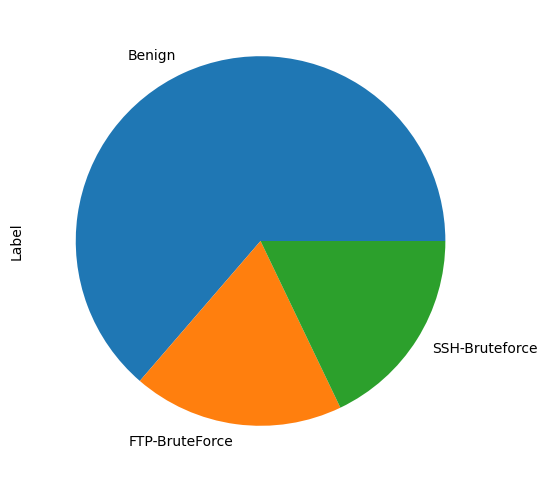

In [12]:
Labels_in_df = df1['Label'].unique()
df1['Label'].value_counts().plot(kind='pie',figsize=(6,6))
df1['Label'].value_counts()

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['Label'] = label_encoder.fit_transform(df1['Label'].values.ravel())
df1['Label'].unique()

array([0, 1, 2])

In [14]:
pd.options.mode.chained_assignment = None
   
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1 = df1.dropna()

print('droping NaN and Inf values, if any')

df1.shape

droping NaN and Inf values, if any


(1044751, 77)

In [15]:
X = df1.drop('Label', axis=1).values
y = df1['Label'].values

In [16]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from tensorflow.keras.utils import to_categorical
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, 1, X_scaled.shape[1])
y_categorical = to_categorical(y)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.3, random_state=52, shuffle=True)

In [19]:
input_shape=(1, 1, X_scaled.shape[1], 1)
input_shape

(1, 1, 76, 1)

In [20]:
num_classes = len(Labels_in_df)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense, BatchNormalization

model = Sequential()
model.add(ConvLSTM2D(24, (1, 1), activation='relu', input_shape=input_shape, return_sequences=True))
model.add(BatchNormalization())
model.add(ConvLSTM2D(32, (1, 1), activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(ConvLSTM2D(32,(1, 1), activation='relu', return_sequences=False))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Step 4: Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
print(f"Model Compiled \n")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 1, 1, 76, 24)      2496      
                                                                 
 batch_normalization (BatchN  (None, 1, 1, 76, 24)     96        
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 1, 1, 76, 32)      7296      
                                                                 
 batch_normalization_1 (Batc  (None, 1, 1, 76, 32)     128       
 hNormalization)                                                 
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 1, 76, 32)         8320      
                                                                 
 batch_normalization_2 (Batc  (None, 1, 76, 32)        1

In [22]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
22854/22854 [==============================] - 785s 34ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0010 - val_accuracy: 0.9999
Epoch 2/10
22854/22854 [==============================] - 755s 33ms/step - loss: 9.4017e-04 - accuracy: 0.9999 - val_loss: 5.4351e-04 - val_accuracy: 0.9999
Epoch 3/10
22854/22854 [==============================] - 777s 34ms/step - loss: 8.0991e-04 - accuracy: 0.9999 - val_loss: 9.6321e-04 - val_accuracy: 0.9999
Epoch 4/10
22854/22854 [==============================] - 769s 34ms/step - loss: 6.7012e-04 - accuracy: 0.9999 - val_loss: 8.3396e-04 - val_accuracy: 0.9999
Epoch 5/10
22854/22854 [==============================] - 774s 34ms/step - loss: 7.2635e-04 - accuracy: 0.9999 - val_loss: 7.5557e-04 - val_accuracy: 0.9999
Epoch 6/10
22854/22854 [==============================] - 771s 34ms/step - loss: 5.4519e-04 - accuracy: 0.9999 - val_loss: 6.6338e-04 - val_accuracy: 0.9999
Epoch 7/10
22854/22854 [==============================] - 776s 34m

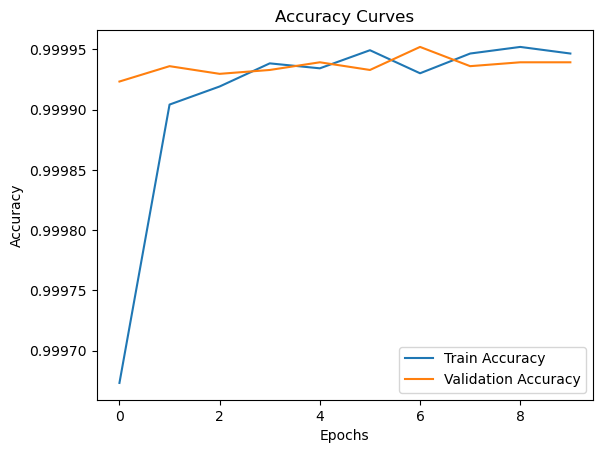

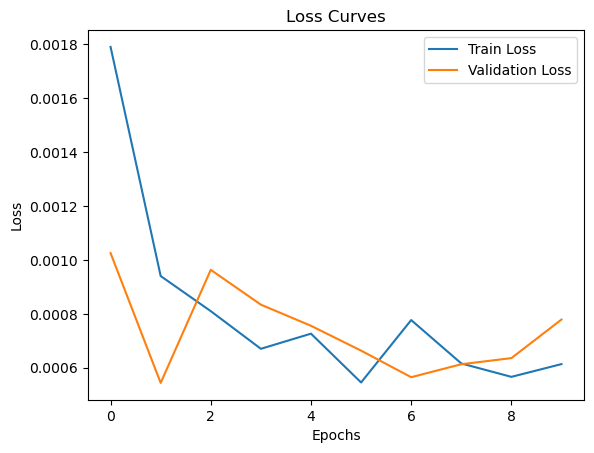

In [23]:
import matplotlib.pyplot as plt
# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
import time

# Perform inference and measure the time
start_time = time.time()
predictions = model.predict(X_reshaped)  # Replace with your own inference code
inference_time = time.time() - start_time

# Print the inference time
print(f"Inference time: {inference_time} seconds")

32649/32649 [==============================] - 247s 8ms/step
Inference time: 324.3440737724304 seconds


In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

9795/9795 [==============================] - 74s 8ms/step


In [26]:
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)
confusion_mat

array([[199030,      2,      4],
       [     0,  58027,      0],
       [     2,     11,  56350]])

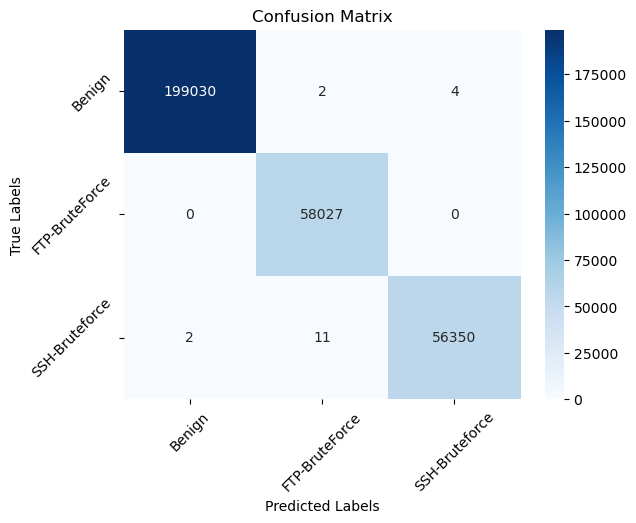

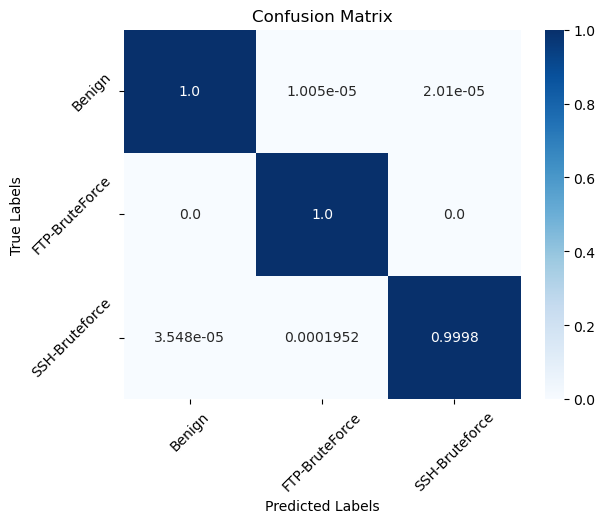

In [27]:
# Convert confusion matrix to DataFrame for better visualization
confusion_df = pd.DataFrame(confusion_mat, index=Labels_in_df, columns=Labels_in_df)

# Display the confusion matrix using a heatmap
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Rotate the x-axis and y-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

# Normalize the confusion matrix by row (i.e., by the number of samples in each class)
row_sums = confusion_mat.sum(axis=1, keepdims=True)
normalized_confusion_mat = confusion_mat / row_sums

# Convert the normalized confusion matrix to a DataFrame for better visualization
confusion_df = pd.DataFrame(normalized_confusion_mat, index=Labels_in_df, columns=Labels_in_df)

# Display the confusion matrix using a heatmap
sns.heatmap(confusion_df, annot=True, fmt='.4', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Rotate the x-axis and y-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()

In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199036
           1       1.00      1.00      1.00     58027
           2       1.00      1.00      1.00     56363

    accuracy                           1.00    313426
   macro avg       1.00      1.00      1.00    313426
weighted avg       1.00      1.00      1.00    313426



In [29]:
del df1, df

In [30]:
import gc
gc.collect()

17745